import required libraries 'pandas'(loading data),'seaborn','matplotlib'(visualisation)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



loading data

In [3]:
file_path_1= 'C:/Users/Agasthya/Documents/IPl_data_analysis/data/cricket_data.csv'
file_path_2= 'C:/Users/Agasthya/Documents/IPl_data_analysis/data/IPL_Matches_2008_2022.csv'

player = pd.read_csv(file_path_1)
match = pd.read_csv(file_path_2)

data cleaning

checking for duplicate values

In [ ]:
player_dup = player[player.duplicated()]
match_dup= match[match.duplicated()]
print(player_dup)
print(match_dup)

deleting method

In [5]:
match = match.drop(columns=['method'])



checking and cleaning null values

In [ ]:


columns_to_fill = ['SuperOver','Margin','City','WinningTeam','Player_of_Match']

match[columns_to_fill] = match[columns_to_fill].fillna('Unknown')

print(f'player_columns:{match.isnull().sum()}')
print(f'macth_columns:{player.isnull().sum()}')

coverting datatypes

In [ ]:
convert_int_player = ['Year','Matches_Batted','Not_Outs','Runs_Scored','Highest_Score','Batting_Average','Balls_Faced','Batting_Strike_Rate',
               'Centuries','Half_Centuries','Fours','Sixes','Catches_Taken','Stumpings','Matches_Bowled','Balls_Bowled','Runs_Conceded',
               'Wickets_Taken','Best_Bowling_Match','Bowling_Average','Economy_Rate','Bowling_Strike_Rate','Four_Wicket_Hauls','Five_Wicket_Hauls'
               ]

player['Player_Name'] = player['Player_Name'].astype(str)



player[convert_int_player] = player[convert_int_player].apply(pd.to_numeric,errors='coerce')

player[convert_int_player]=player[convert_int_player].fillna(0).astype(int)


covert_int_match = ['ID','Date','Season','MatchNumber','WonBy']

match[covert_int_match] = match[covert_int_match].apply(pd.to_numeric, errors='coerce')

match[covert_int_match] = match[covert_int_match].fillna(0).astype(int)



match.info()
player.info()






* data analysis *

creating stats for all players using groupby (i can use this stat to creart n number of tables )

In [ ]:
player_stats_sum = player[['Player_Name','Matches_Batted','Not_Outs','Runs_Scored','Balls_Faced',
               'Centuries','Half_Centuries','Fours','Sixes','Catches_Taken','Stumpings','Matches_Bowled','Balls_Bowled','Runs_Conceded',
               'Wickets_Taken','Four_Wicket_Hauls','Five_Wicket_Hauls']].groupby('Player_Name').sum()

player_stats_avg = player[['Player_Name','Batting_Average','Batting_Strike_Rate',
               'Bowling_Average','Economy_Rate','Bowling_Strike_Rate']].groupby('Player_Name').mean()

print(f'stat1={player_stats_sum }')
print(f'stat2={player_stats_avg }')

In [74]:
player_stats_sum.to_csv('C:/Users/Agasthya/Documents/IPl_data_analysis/data/player_stat1.csv')
player_stats_avg.to_csv('C:/Users/Agasthya/Documents/IPl_data_analysis/data/player_stat2.csv')

find stats for specific player

In [45]:
# Replace 'Player_Name' with the actual name of the player you want to find stats for
player_name = 'Virat Kohli'


specific_player_stats = player_stats_sum.loc[player_name]



In [ ]:
specific_player_stats

creating top player via any stat we want

In [26]:
top_run = player_stats_sum.sort_values(by='Runs_Scored',ascending=False).head(10)
top_wickets = player_stats_sum.sort_values(by='Wickets_Taken',ascending=False).head(10)
most_sixes = player_stats_sum.sort_values(by='Sixes',ascending=False).head(25)



In [ ]:
top_run['Runs_Scored'].plot(kind='bar',color='orange',figsize=(10,5))
plt.title('top 10 batsman with most runs')
plt.xlabel('player name')
plt.ylabel('runs scored')
plt.xticks(rotation =90)
plt.show()

In [ ]:
top_wickets['Wickets_Taken'].plot(kind='bar',color='purple',figsize=(10,5))
plt.title('top 10 blowers with most wickets')
plt.xlabel('player name')
plt.ylabel('wickets taken')
plt.xticks(rotation =90)
plt.show()

*Team wise performance*

number of matches won by each team

In [49]:
match_won = match['WinningTeam'].value_counts()

In [ ]:
match_won

toss and decision impact

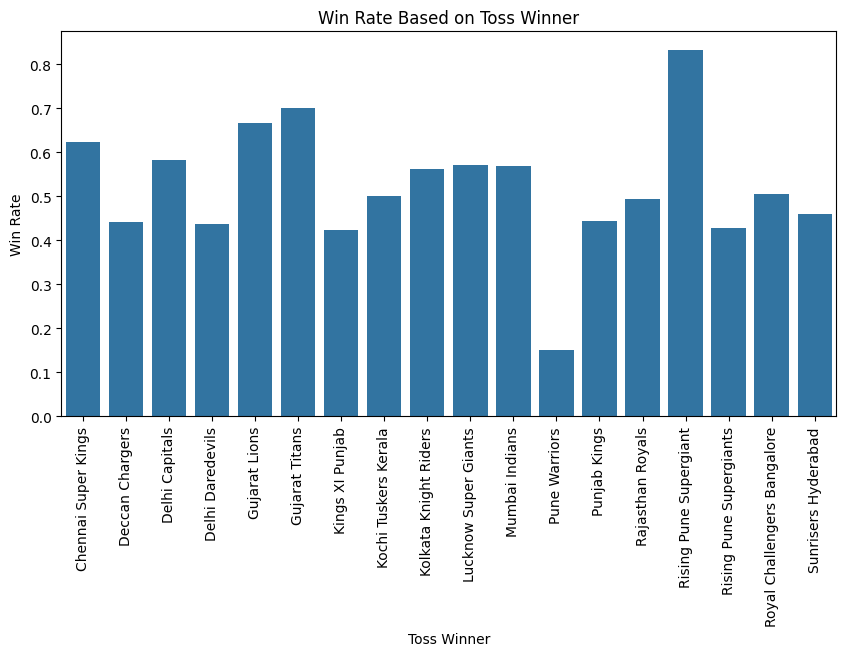

In [70]:
toss_winner_winrate = match.groupby('TossWinner')['WinningTeam'].apply(lambda x: (x == x.name).mean())

plt.figure(figsize=(10, 5))
sns.barplot(x=toss_winner_winrate.index, y=toss_winner_winrate.values)
plt.title('Win Rate Based on Toss Winner')
plt.xlabel('Toss Winner')
plt.ylabel('Win Rate')
plt.xticks(rotation=90)
plt.show()

In [72]:
player.to_excel('C:/Users/Agasthya/Documents/IPl_data_analysis/data/cricket_data.xlsx',index = False)